<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/Heteroscedasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import pandas as pd

In [38]:
df = pd.read_csv("http://ishelp.info/data/pokemon.csv")

In [39]:
df.head()

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
0,Bulbasaur,grass,poison,6.9,45,49,49,45,1,0
1,Ivysaur,grass,poison,13.0,60,62,63,60,1,0
2,Venusaur,grass,poison,100.0,80,100,123,80,1,0
3,Charmander,fire,NaN,8.5,39,52,43,65,1,0
4,Charmeleon,fire,NaN,19.0,58,64,58,80,1,0


In [40]:
df.columns

Index(['name', 'type1', 'type2', 'weight_kg', 'hp', 'attack', 'defense',
       'speed', 'generation', 'is_legendary'],
      dtype='object')

In [41]:
data_types = {}
for col in df.columns:
  if isinstance(df[col].dtype, pd.CategoricalDtype):
    data_types[col] = 'categorical'
  if pd.api.types.is_numeric_dtype(df[col]):
    data_types[col] = 'numeric'
  else:
        data_types[col] = 'other'
data_types


{'name': 'other',
 'type1': 'other',
 'type2': 'other',
 'weight_kg': 'numeric',
 'hp': 'numeric',
 'attack': 'numeric',
 'defense': 'numeric',
 'speed': 'numeric',
 'generation': 'numeric',
 'is_legendary': 'numeric'}

In [42]:
unique ={}
for element in data_types:
  unique[element] = df[element].nunique()
unique

{'name': 801,
 'type1': 18,
 'type2': 18,
 'weight_kg': 421,
 'hp': 99,
 'attack': 114,
 'defense': 109,
 'speed': 113,
 'generation': 7,
 'is_legendary': 2}

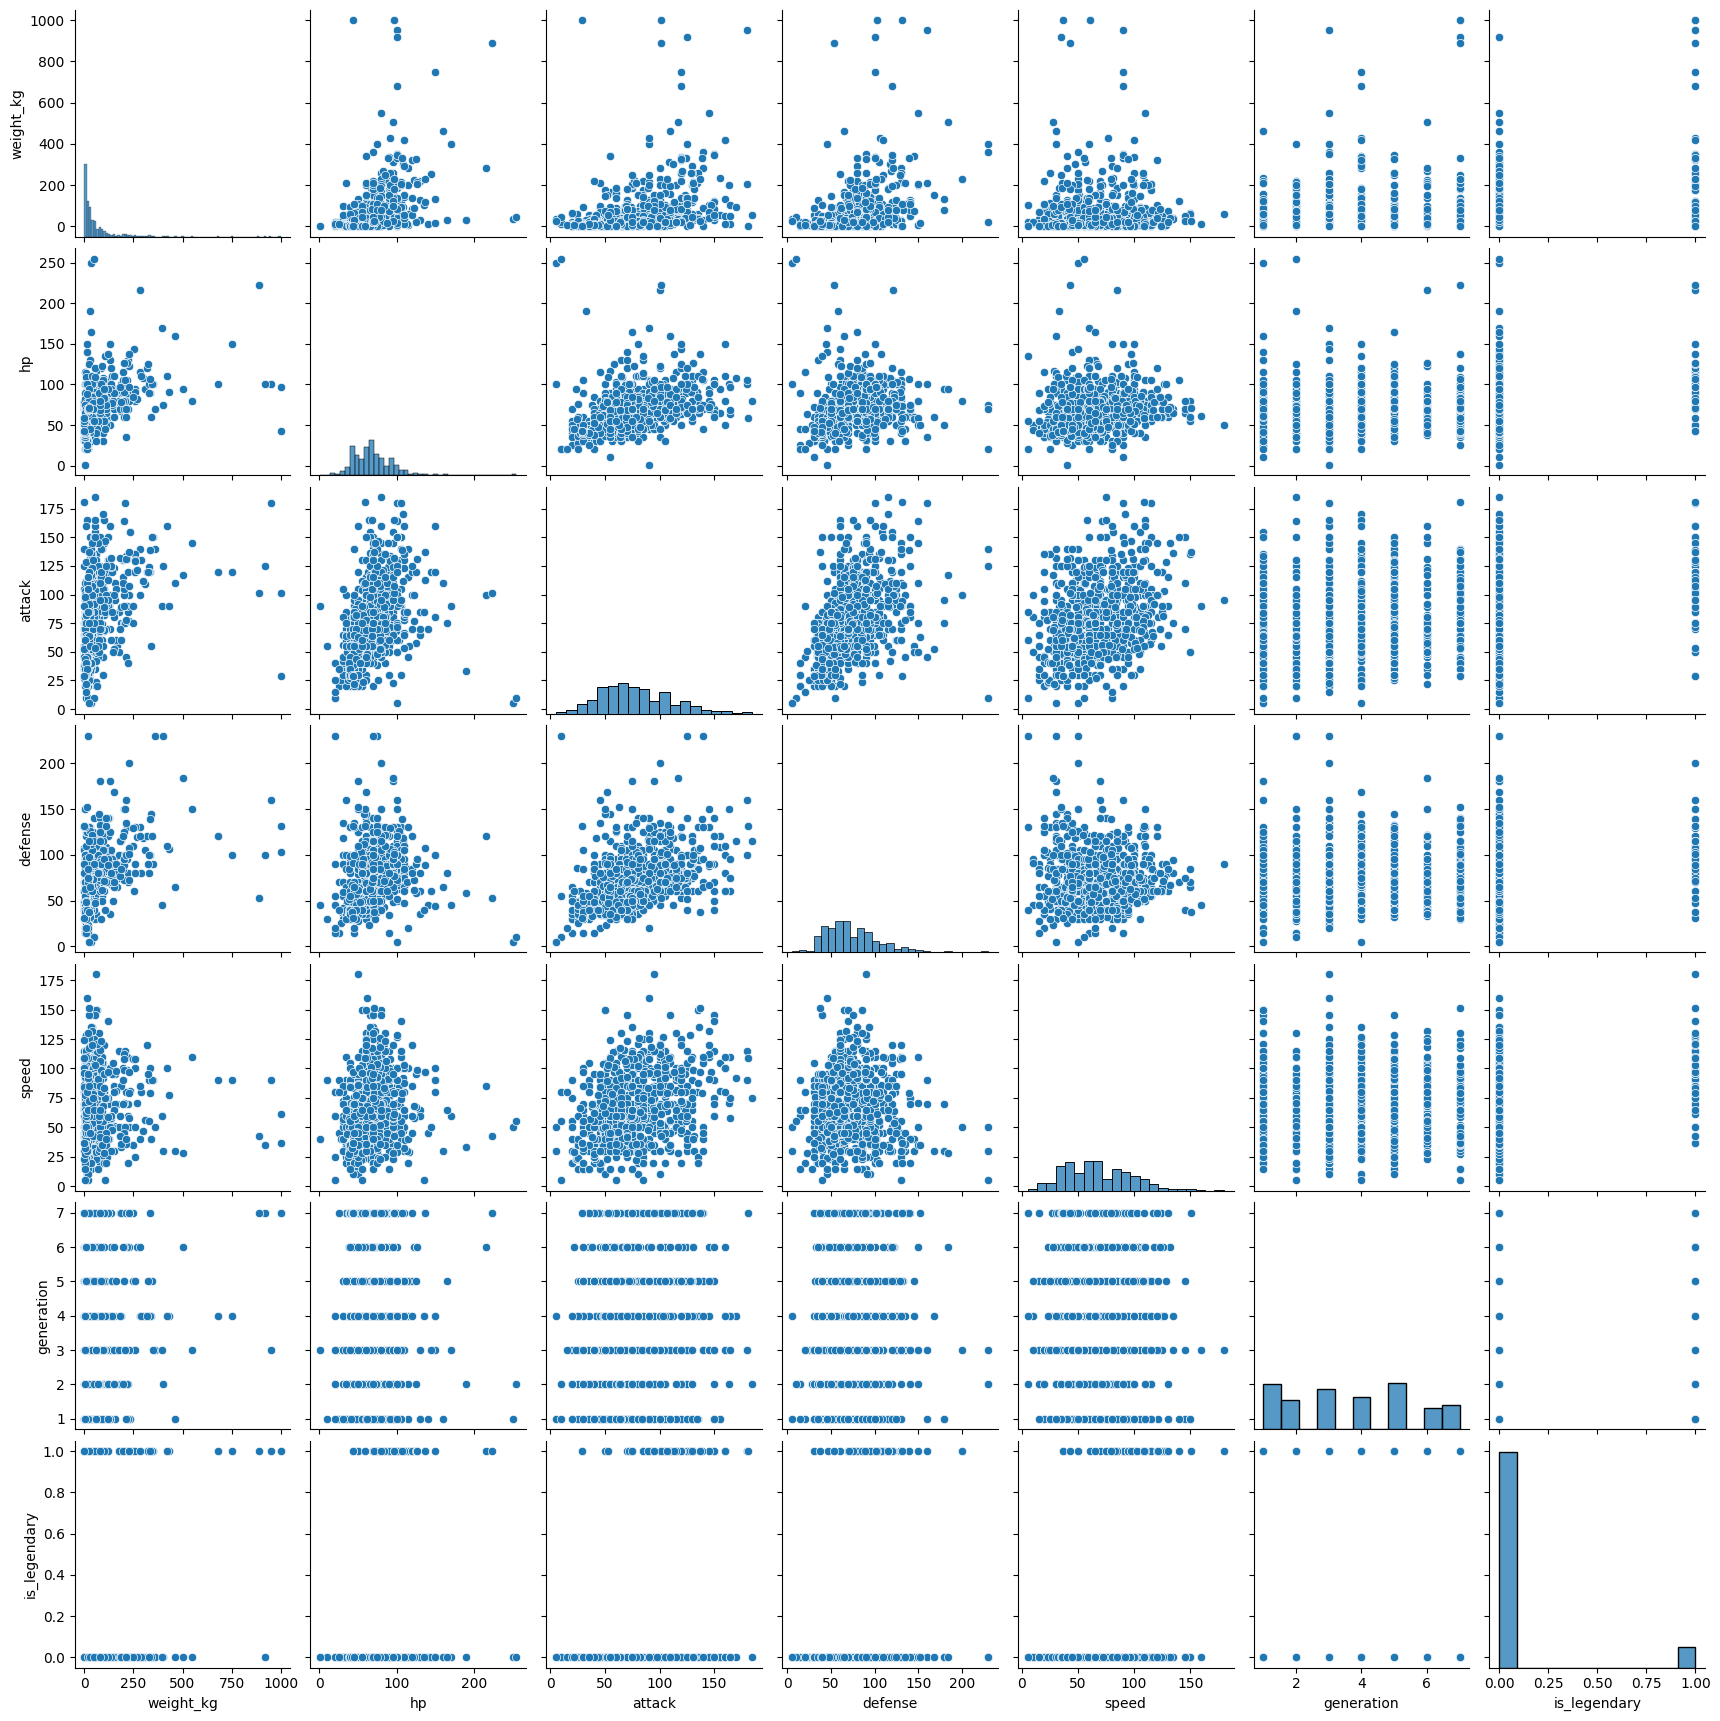

In [43]:
#simplie visualizations
sns.pairplot(df)

In [44]:
corr= pd.DataFrame(['correlation', 'p_value'])
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    r, p = stats.pearsonr(df['is_legendary'], df[col])
    corr.loc[col, 'correlation'] = r
    corr.loc[col, 'p_value'] = p


corr

,0,correlation,p_value
0,correlation,NaN,NaN
1,p_value,NaN,NaN
weight_kg,NaN,NaN,NaN
hp,NaN,0.308405,4.127358e-19
attack,NaN,0.303295,1.663924e-18
defense,NaN,0.265587,2.129723e-14
speed,NaN,0.311639,1.684159e-19
generation,NaN,0.139029,7.885778e-05
is_legendary,NaN,1.000000,0.000000e+00


<Axes: >

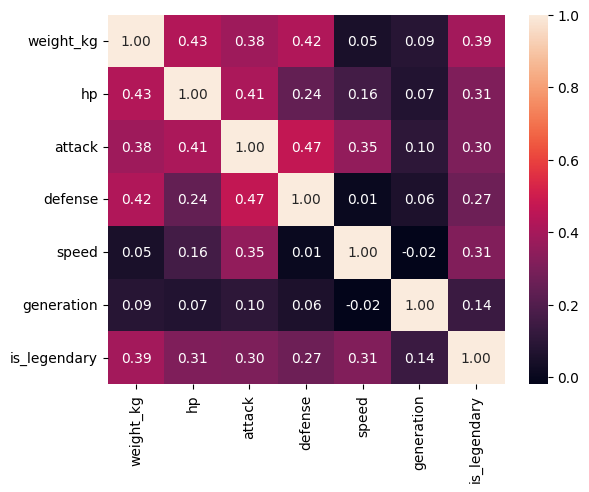

In [45]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")

In [46]:
type_1_list = list(set(df.type1))
type_1_map = {}

for element in df.type1:
  result = [int(item==element) for item in type_1_list]
  type_1_map[element] = result

type_1_map

{'grass': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'fire': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 'water': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'bug': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 'normal': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'poison': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 'electric': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 'ground': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 'fairy': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 'fighting': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'psychic': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'rock': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'ghost': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'ice': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 'dragon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 'da

In [47]:
type_2_list = list(set(df.type1))
type_2_map = {}

for element in df.type2:
  result = [int(item==element) for item in type_2_list]
  type_2_map[element] = result

type_2_map

{'poison': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 nan: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'flying': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'dark': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'electric': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 'ice': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 'ground': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 'fairy': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 'grass': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'fighting': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'psychic': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'steel': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 'fire': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 'rock': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'water': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'dragon

In [63]:
df_cleaned = df[[col for col in df.columns if col != 'name']]
df_cleaned['weight_kg'] = df['weight_kg'].interpolate()

df_onehot = pd.get_dummies(df_cleaned, columns=['type1', 'type2']).astype(float)

df_onehot

# from collections import defaultdict
# map_of_types = defaultdict(list)
# for col in df_onehot:
#   map_of_types[col].extend(df_onehot[col].unique())

# nan_tracker = {}

# for key in map_of_types:
#   for val in map_of_types[key]:
#     if not isinstance(val, int):
#       nan_tracker[key] = map_of_types[key].index(val)
# nan_tracker


/tmp/ipython-input-1137832356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['weight_kg'] = df['weight_kg'].interpolate()


,weight_kg,hp,attack,defense,speed,generation,is_legendary,type1_bug,type1_dark,type1_dragon,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,6.9,45.0,49.0,49.0,45.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,13.0,60.0,62.0,63.0,60.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,100.0,80.0,100.0,123.0,80.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8.5,39.0,52.0,43.0,65.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.0,58.0,64.0,58.0,80.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,999.9,97.0,101.0,103.0,61.0,7.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.1,59.0,181.0,131.0,109.0,7.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
798,888.0,223.0,101.0,53.0,43.0,7.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799,230.0,97.0,107.0,101.0,79.0,7.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X = df_onehot[(element for element in df_onehot.columns if element != 'is_legendary')]
y = df_onehot['is_legendary']

In [65]:
df_onehot.isnull().sum(axis=0)

,0
weight_kg,0
hp,0
attack,0
defense,0
speed,0
generation,0
is_legendary,0
type1_bug,0
type1_dark,0
type1_dragon,0


In [66]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [68]:
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_preds = model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
print(accuracy_score(y_test, y_preds))

0.9502487562189055


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Optional: scaling is often helpful for LR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

# Define parameter grid
param_grid = {
    'lr__C': [0.01, 0.1, 1, 10, 100],      # regularization strength
    'lr__penalty': ['l1', 'l2'],           # regularization type
    'lr__solver': ['liblinear', 'saga']    # solvers compatible with L1/L2
}

# Setup GridSearch
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,            # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Predict on test set
y_preds = grid_search.predict(X_test)


Best Parameters: {'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solver': 'saga'}
Best CV Accuracy: 0.9316666666666666


In [73]:
import xgboost

In [74]:
model = xgboost.XGBClassifier()

In [75]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [76]:
y_preds = model.predict(X_test)

In [77]:
accuracy_score(y_test, y_preds)

0.9651741293532339

In [78]:
model = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # for classification

params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'scale_pos_weight': [1]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

y_preds = grid_search.predict(X_test)

KeyboardInterrupt: 

In [81]:
#run on GPU version

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# GPU-enabled XGBoost model
model = XGBClassifier(
    device='cuda',           # first GPU
    use_label_encoder=False, # avoid warning
    eval_metric='logloss'
)

# Hyperparameter grid
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5],
    'scale_pos_weight': [1]
}

# Grid search setup
grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # parallel CPU usage; GPU will still be used for XGBoost
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Predictions
y_preds = grid_search.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:30:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'scale_pos_weight': 1, 'subsample': 0.8}
Best CV Accuracy: 0.9516666666666668


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:774: UserWarning: [18:30:04] WARNING: /workspace/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
